In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
from matplotlib import rc
import glob
#rc('figure', figsize=(12,9))

In [2]:
#path = '/Users/lindleyr/Desktop/lsa-ast361/Work/lindleyr/lab7/radio-astronomy/sun_azimuth/'
path = '/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab7/radio-astronomy/sun_azimuth/'

az_files = glob.glob(path + "sun*") 
az_files.sort()

In [3]:
az_spectra = []

for az_file in az_files:
    with open(az_file) as az_data:
        spectrum_rows = [] 
        for j, row in enumerate(az_data, start=1):
            if j%4 == 0:
                spectrum_rows.append(row)
                
        tot_spectrum = np.zeros(1024)
        for row in spectrum_rows: 
            temp_spec = row.split(' ')
            spec = []
            for val in temp_spec:
                if val != '' and val != '\n':
                    spec.append(val)
                    
            tot_spectrum = tot_spectrum + np.float64(spec)
            
        az_spectra.append(tot_spectrum)
        


In [4]:
az_spectra_array = np.asarray(az_spectra)
az_spectra_array.shape


(20, 1024)

In [5]:
for file in az_files:
    print(file)

/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab7/radio-astronomy/sun_azimuth/sun-1_0.dat
/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab7/radio-astronomy/sun_azimuth/sun-2_0.dat
/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab7/radio-astronomy/sun_azimuth/sun-3_0.dat
/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab7/radio-astronomy/sun_azimuth/sun-4_0.dat
/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab7/radio-astronomy/sun_azimuth/sun-5_0.dat
/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab7/radio-astronomy/sun_azimuth/sun-6_0.dat
/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab7/radio-astronomy/sun_azimuth/sun-7_0.dat
/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab7/radio-astronomy/sun_azimuth/sun-8_0.dat
/Users/ryanlindley/Dropbox/Ryan/UMich/Cl

In [6]:
file_x = np.array([-1, -2, -3, -4, -5, -6, -7, -8, -9, 0, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9])

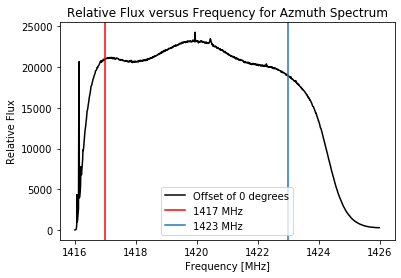

In [32]:
freq = np.arange(1416, 1426, .009766)
# go from 1417 to 423 

plt.plot(freq,az_spectra_array[9][:], '-k', label='Offset of 0 degrees')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Relative Flux')
plt.title('Relative Flux versus Frequency for Azmuth Spectrum')
plt.axvline(1417, color='r', label='1417 MHz')
plt.axvline(1423, label='1423 MHz')
plt.legend()
plt.show()


In [8]:
avg_flux_az = []

for i in range(0,20):
    avg_flux_az.append(az_spectra_array[i][102:717])
    
avg_flux_az_array = np.asarray(avg_flux_az).mean(axis=1)

avg_flux_az_array.shape




(20,)

Text(0.5, 1.0, 'Relative Flux versus Distance from Azimuth')

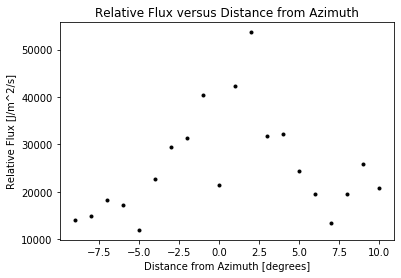

In [9]:
plt.plot(file_x, avg_flux_az_array, '.k')
plt.xlabel('Distance from Azimuth [degrees]')
plt.ylabel('Relative Flux [J/m^2/s]')
plt.title('Relative Flux versus Distance from Azimuth')

In [10]:
def gaussian_az(x, sigma, mu, amp):
    den = sigma * np.sqrt(2*np.pi)
    exp = -1/2 * ((x - mu) / sigma)**2
    total = amp * np.exp(exp) / den 
    return total


sigma = 6.3796716689476005, mu = 1.2436701742194762, amp = 569449.2323600103


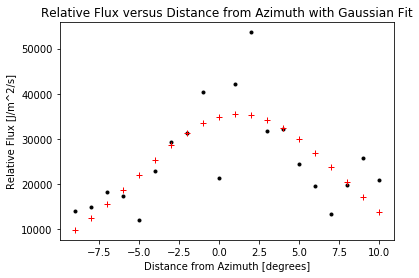

In [11]:
sigma0, mu0, amp0 = (7,0,3000)
coeffs, fiterr = curve_fit(gaussian_az, file_x, avg_flux_az_array, p0=(sigma0, mu0, amp0))

print ("sigma = %s, mu = %s, amp = %s" % (coeffs[0], coeffs[1], coeffs[2]))
plt.plot(file_x, avg_flux_az_array, 'k.')
plt.plot(file_x,gaussian_az(file_x, coeffs[0], coeffs[1], coeffs[2]),'r+')
plt.xlabel('Distance from Azimuth [degrees]')
plt.ylabel('Relative Flux [J/m^2/s]')
plt.title('Relative Flux versus Distance from Azimuth with Gaussian Fit')
plt.show()

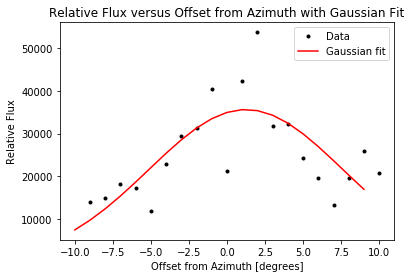

In [33]:
plt.plot(file_x, avg_flux_az_array, 'k.', label='Data')
plt.plot(np.arange(-10,10,1),gaussian_az(np.arange(-10,10,1), 6.3796, 1.2436, 569449),'r-', label='Gaussian fit')
plt.xlabel('Offset from Azimuth [degrees]')
plt.ylabel('Relative Flux')
plt.title('Relative Flux versus Offset from Azimuth with Gaussian Fit')
plt.legend()
plt.show()

In [13]:
maximum = np.max(gaussian_az(np.arange(-10,10,1), 6.3796, 1.2436, 569449))
print(maximum)

35584.00634496137


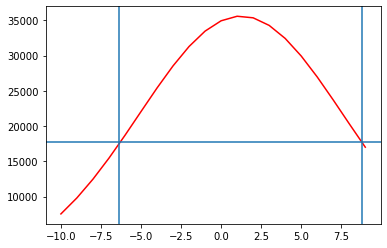

Graph:  15.200000000000001
Formula:  15.022809959279444


In [14]:
plt.plot(np.arange(-10,10,1),gaussian_az(np.arange(-10,10,1), 6.3796, 1.2436, 569449),'r-')
plt.axhline(maximum/2)
plt.axvline(-6.4)
plt.axvline(8.8)
plt.show()

width = 8.8 + 6.4
print('Graph: ',width)
print('Formula: ', 2*np.sqrt(2*np.log(2))*6.3796)

In [15]:
#path = '/Users/lindleyr/Desktop/lsa-ast361/Work/lindleyr/lab7/radio-astronomy/sun_elevation/'
path2 = '/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab7/radio-astronomy/sun_elevation/'

el_files = glob.glob(path2 + "sun*") 
el_files.sort()

In [16]:
el_spectra = []

for el_file in el_files:
    with open(el_file) as el_data:
        spectrum_rows = [] 
        for j, row in enumerate(el_data, start=1):
            if j%4 == 0:
                spectrum_rows.append(row)
                
        tot_spectrum = np.zeros(1024)
        for row in spectrum_rows: 
            temp_spec = row.split(' ')
            spec = []
            for val in temp_spec:
                if val != '' and val != '\n':
                    spec.append(val)
                    
            tot_spectrum = tot_spectrum + np.float64(spec)
            
        el_spectra.append(tot_spectrum)
        
el_spectra_array = np.asarray(el_spectra)
el_spectra_array.shape



(15, 1024)

In [17]:
for file in el_files:
    print(file)

/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab7/radio-astronomy/sun_elevation/sun_el_m1
/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab7/radio-astronomy/sun_elevation/sun_el_m2
/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab7/radio-astronomy/sun_elevation/sun_el_m3
/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab7/radio-astronomy/sun_elevation/sun_el_m4
/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab7/radio-astronomy/sun_elevation/sun_el_m5
/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab7/radio-astronomy/sun_elevation/sun_el_p1
/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab7/radio-astronomy/sun_elevation/sun_el_p10
/Users/ryanlindley/Dropbox/Ryan/UMich/Classes/Fall Semester 2019/Astro 361/lab7/radio-astronomy/sun_elevation/sun_el_p2
/Users/ryanlindley/Dropbox/Ryan/UMich/C

In [18]:
file_el = np.array([-1, -2, -3, -4, -5, 1,10,2,3,4,5,6,8,9])
file_el.shape

(14,)

In [19]:
avg_flux_el = []

for i in range(0,14):
    avg_flux_el.append(el_spectra_array[i][102:717])
    
avg_flux_el_array = np.asarray(avg_flux_el).mean(axis=1)

avg_flux_el_array.shape

(14,)

Text(0.5, 1.0, 'Relative Flux versus Distance from Elevation')

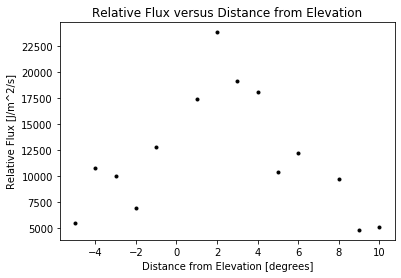

In [20]:
plt.plot(file_el, avg_flux_el_array, '.k')
plt.xlabel('Distance from Elevation [degrees]')
plt.ylabel('Relative Flux [J/m^2/s]')
plt.title('Relative Flux versus Distance from Elevation')

sigma = 4.39596841645534, mu = 2.180235572795998, amp = 206321.72002949935


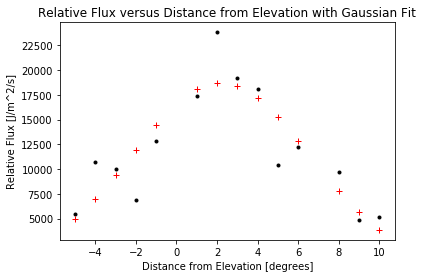

In [21]:
sigma1, mu1, amp1 = (7,2,30000)
coeffs, fiterr = curve_fit(gaussian_az, file_el, avg_flux_el_array, p0=(4.4,2,206000))

print ("sigma = %s, mu = %s, amp = %s" % (coeffs[0], coeffs[1], coeffs[2]))
plt.plot(file_el, avg_flux_el_array, 'k.')
plt.plot(file_el,gaussian_az(file_el, coeffs[0], coeffs[1], coeffs[2]),'r+')
plt.xlabel('Distance from Elevation [degrees]')
plt.ylabel('Relative Flux [J/m^2/s]')
plt.title('Relative Flux versus Distance from Elevation with Gaussian Fit')
plt.show()

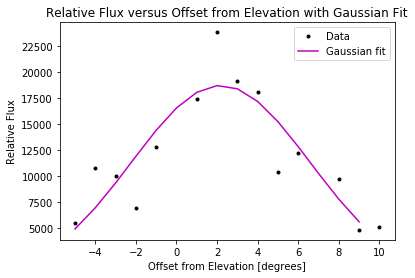

In [38]:
plt.plot(file_el, avg_flux_el_array, 'k.', label='Data')
plt.plot(np.arange(-5,10,1),gaussian_az(np.arange(-5,10,1), 4.3959, 2.18, 206320),'m-', label='Gaussian fit')
plt.xlabel('Offset from Elevation [degrees]')
plt.ylabel('Relative Flux')
plt.title('Relative Flux versus Offset from Elevation with Gaussian Fit')
plt.legend()
plt.show()

In [23]:
maximum2 = np.max(gaussian_az(np.arange(-5,10,1), 4.3959, 2.18, 206320))
print(maximum2)

18708.523114519205


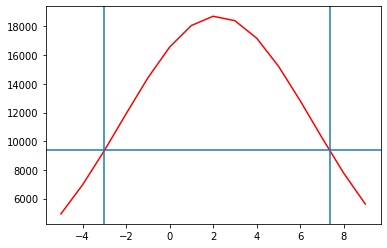

Garph:  10.4
Formula:  10.351553435951551


In [24]:
plt.plot(np.arange(-5,10,1),gaussian_az(np.arange(-5,10,1), 4.3959, 2.18, 206320),'r-')
plt.axhline(maximum2/2)
plt.axvline(-3)
plt.axvline(7.4)
plt.show()

width2 = 7.4 + 3
print('Garph: ', width2)
print('Formula: ', 2*np.sqrt(2*np.log(2))*4.3959)

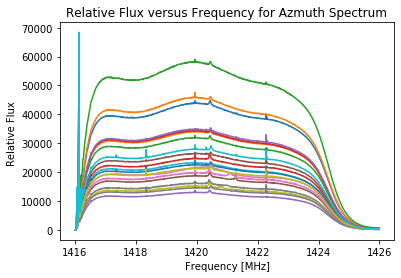

In [27]:
for i in range (0,20):
    plt.plot(freq, az_spectra_array[i][:])
    
plt.xlabel('Frequency [MHz]')
plt.ylabel('Relative Flux ')
plt.title('Relative Flux versus Frequency for Azmuth Spectrum')
plt.show()

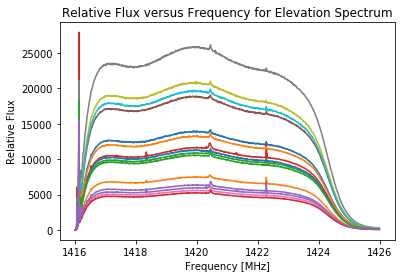

In [28]:
for i in range (0,15):
    plt.plot(freq, el_spectra_array[i][:])
    
plt.xlabel('Frequency [MHz]')
plt.ylabel('Relative Flux')
plt.title('Relative Flux versus Frequency for Elevation Spectrum')
plt.show()